In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("2020_al.csv")

In [3]:
data.shape

(337553, 19)

In [4]:
data.head()

,index,stream,Zscore,district_rank,island_rank,al_year,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,cgt_r,ge_r,syllabus,birth_day,birth_month,birth_year,gender
0,0,ARTS,-.3550,4336 (NEW),64994 (NEW),2020,POLITICAL SCIENCE,S,DANCING(BHARATHA),C,TAMIL,S,056,S,new,31,May,2001,female
1,1,ARTS,-.2648,4154 (NEW),62338 (NEW),2020,POLITICAL SCIENCE,S,CARNATIC MUSIC,C,TAMIL,C,032,C,new,13,January,2002,female
2,2,COMMERCE,-.4760,6910 (NEW),37307 (NEW),2020,ECONOMICS,S,BUSINESS STUDIES,S,ACCOUNTING,S,050,S,new,16,August,2001,female
3,3,COMMERCE,-.1012,5678 (NEW),30449 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,S,034,S,new,16,August,2001,female
4,4,COMMERCE,.6014,3269 (NEW),17010 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,B,036,S,new,7,August,2000,female


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   index          337553 non-null  int64 
 1   stream         337553 non-null  object
 2   Zscore         337553 non-null  object
 3   district_rank  337553 non-null  object
 4   island_rank    337553 non-null  object
 5   al_year        337553 non-null  int64 
 6   sub1           337553 non-null  object
 7   sub1_r         337553 non-null  object
 8   sub2           337553 non-null  object
 9   sub2_r         337553 non-null  object
 10  sub3           337553 non-null  object
 11  sub3_r         337553 non-null  object
 12  cgt_r          337553 non-null  object
 13  ge_r           337553 non-null  object
 14  syllabus       337553 non-null  object
 15  birth_day      337553 non-null  object
 16  birth_month    337553 non-null  object
 17  birth_year     337553 non-null  object
 18  gend

In [6]:
data.isnull().sum()

index               0
stream              0
Zscore              0
district_rank       0
island_rank         0
al_year             0
sub1                0
sub1_r              0
sub2                0
sub2_r              0
sub3                0
sub3_r              0
cgt_r               0
ge_r                0
syllabus            0
birth_day           0
birth_month         0
birth_year          0
gender           1484
dtype: int64

# data preprossing

# Handle missing values

In [7]:

data['gender'].fillna('Unknown', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27968\4068182367.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].fillna('Unknown', inplace=True)


In [8]:
data['gender'].unique()

array(['female', 'male', 'Unknown', 'Major error'], dtype=object)

# Clean and convert columns

In [9]:
# Strip and convert 'Zscore' to numeric

data['Zscore'] = pd.to_numeric(data['Zscore'], errors='coerce')
data['cgt_r'] = pd.to_numeric(data['cgt_r'], errors='coerce')

In [10]:
data['Zscore']

0        -0.3550
1        -0.2648
2        -0.4760
3        -0.1012
4         0.6014
           ...  
337548       NaN
337549   -0.3467
337550       NaN
337551    0.0509
337552   -0.1560
Name: Zscore, Length: 337553, dtype: float64

In [11]:
# Drop irrelevant or redundant columns
columns_to_drop = ['index', 'al_year', 'birth_day', 'birth_month','district_rank','island_rank', 'ge_r','cgt_r']  #'birth_year'
data = data.drop(columns=columns_to_drop)

data['birth_year'] = pd.to_numeric(data['birth_year'], errors='coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   stream      337553 non-null  object 
 1   Zscore      232304 non-null  float64
 2   sub1        337553 non-null  object 
 3   sub1_r      337553 non-null  object 
 4   sub2        337553 non-null  object 
 5   sub2_r      337553 non-null  object 
 6   sub3        337553 non-null  object 
 7   sub3_r      337553 non-null  object 
 8   syllabus    337553 non-null  object 
 9   birth_year  335970 non-null  float64
 10  gender      337553 non-null  object 
dtypes: float64(2), object(9)
memory usage: 28.3+ MB


# Analysis

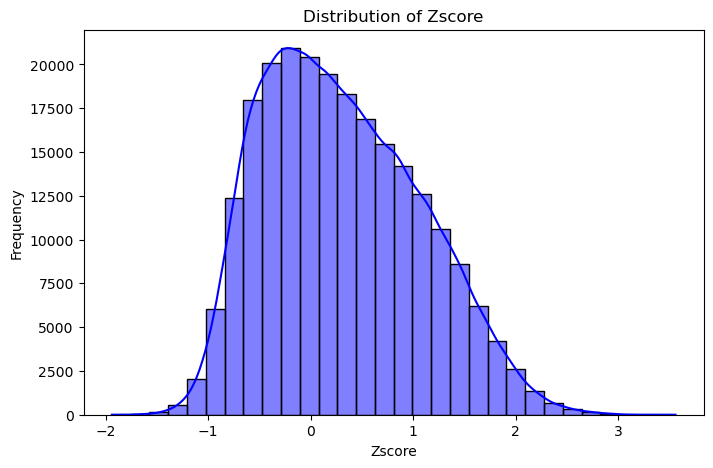

In [13]:
# Distribution of Zscore
plt.figure(figsize=(8, 5))
sns.histplot(data['Zscore'], kde=True, bins=30, color='blue')
plt.title('Distribution of Zscore')
plt.xlabel('Zscore')
plt.ylabel('Frequency')
plt.show()

The Zscore values are roughly normally distributed with a slight skew, indicating a potential need for normalization or transformation if required.

In [44]:
labelname = data.sub1.unique()

array([47, 21, 39, 34, 17, 26, 37, 38, 46, 41, 35, 12,  3,  1, 10, 14, 42,
       40, 29,  4,  9,  8, 13, 27, 36, 20,  7,  0, 19, 25, 22, 16, 44, 24,
        6, 15,  2, 48, 23, 30, 50, 43, 49, 45,  5, 11, 18, 32, 31, 33, 28])

In [15]:
# Encode categorical variables
categorical_cols = ['stream', 'sub1', 'sub1_r', 'sub2', 'sub2_r', 'sub3', 'sub3_r', 'syllabus', 'gender']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

In [50]:
{label: code for label, code in zip(label_encoders['sub1'].classes_, range(len(label_encoders['sub1'].classes_)))}

{'ACCOUNTING': 0,
 'AGRICULTURAL SCIENCE': 1,
 'AGRO TECHNOLOGY': 2,
 'ART': 3,
 'BIO SYSTEMS TECHNOLOGY': 4,
 'BIO-RESOURCE TECHNOLOGY': 5,
 'BIOLOGY': 6,
 'BUDDHISM': 7,
 'BUDDHIST CIVILIZATION': 8,
 'BUSINESS STATISTICS': 9,
 'BUSINESS STUDIES': 10,
 'CARNATIC MUSIC': 11,
 'CHEMISTRY': 12,
 'CHRISTIAN CIVILIZATION': 13,
 'CHRISTIANITY': 14,
 'CIVIL TECHNOLOGY': 15,
 'COMBINED MATHEMATICS': 16,
 'COMMUNICATION & MEDIA STUDIES': 17,
 'DANCING(BHARATHA)': 18,
 'DANCING(INDIGENOUS)': 19,
 'DRAMA AND THEATRE (SINHALA)': 20,
 'ECONOMICS': 21,
 'ELECTRICAL,ELECTRONIC AND IT': 22,
 'ENGINEERING TECHNOLOGY': 23,
 'ENGLISH': 24,
 'FOOD TECHNOLOGY': 25,
 'GEOGRAPHY': 26,
 'GREEK & ROMAN CIVILIZATION': 27,
 'HIGHER MATHEMATICS': 28,
 'HINDU CIVILIZATION': 29,
 'HINDUISM': 30,
 'HISTORY OF EUROPE': 31,
 'HISTORY OF INDIA': 32,
 'HISTORY OF MODERN WORLD': 33,
 'HISTORY OF SRI LANKA & EUROPE': 34,
 'HISTORY OF SRI LANKA & INDIA': 35,
 'HISTORY OF SRI LANKA & MODERN WORLD': 36,
 'HOME ECONOMICS': 3

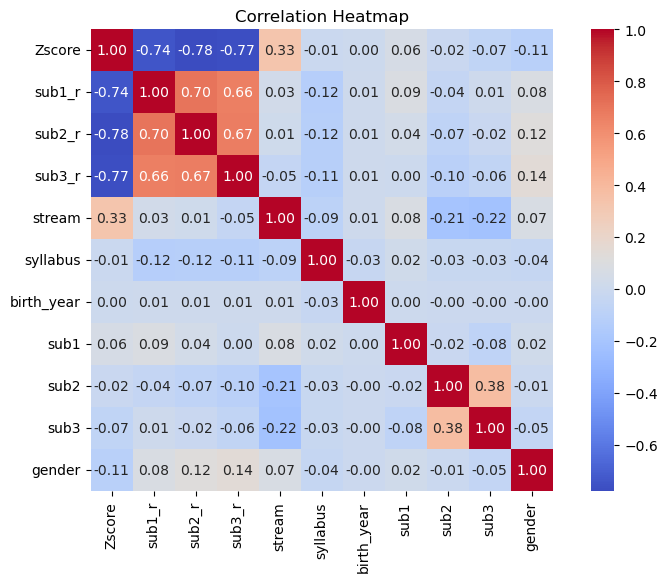

In [16]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
numeric_data = data[['Zscore', 'sub1_r', 'sub2_r','sub3_r','stream','syllabus','birth_year','sub1','sub2','sub3','gender']]
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

Moderate to strong negative correlations between district_rank, island_rank, and Zscore.
No significant correlation with birth_year.

In [17]:
data = data.drop(columns=['birth_year'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27968\1033062154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stream', data=data, palette='viridis', order=data['stream'].value_counts().index)


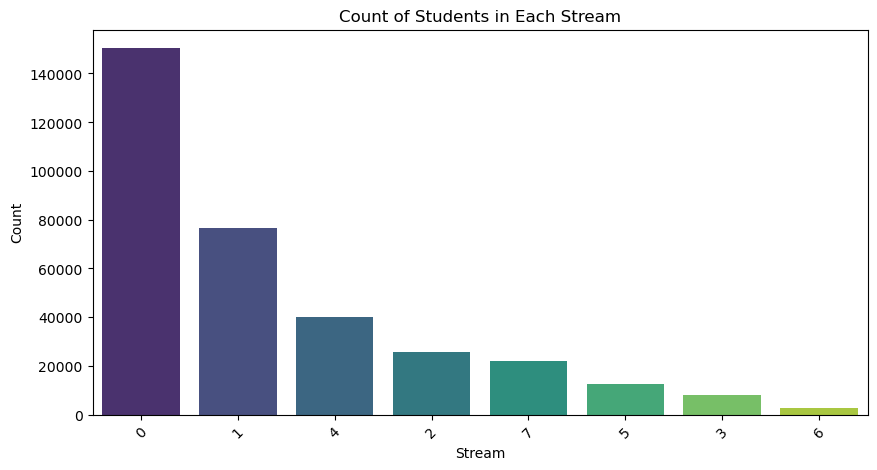

In [18]:
# Countplot for categorical variable 'stream'
plt.figure(figsize=(10, 5))
sns.countplot(x='stream', data=data, palette='viridis', order=data['stream'].value_counts().index)
plt.title('Count of Students in Each Stream')
plt.xlabel('Stream')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,-0.3550,47,5,20,3,58,6,0,2
1,1,-0.2648,47,5,12,3,58,4,0,2
2,4,-0.4760,21,5,11,5,0,6,0,2
3,4,-0.1012,21,3,11,3,0,6,0,2
4,4,0.6014,21,3,11,3,0,3,0,2


In [20]:
data.isnull().sum()

stream           0
Zscore      105249
sub1             0
sub1_r           0
sub2             0
sub2_r           0
sub3             0
sub3_r           0
syllabus         0
gender           0
dtype: int64

In [21]:
# Fill missing key values with mean or mode
data['Zscore'].fillna(data['Zscore'].mean(), inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27968\375335792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Zscore'].fillna(data['Zscore'].mean(), inplace=True)


In [22]:
data.isnull().sum()

stream      0
Zscore      0
sub1        0
sub1_r      0
sub2        0
sub2_r      0
sub3        0
sub3_r      0
syllabus    0
gender      0
dtype: int64

In [23]:
data.sub1.unique()

array([47, 21, 39, 34, 17, 26, 37, 38, 46, 41, 35, 12,  3,  1, 10, 14, 42,
       40, 29,  4,  9,  8, 13, 27, 36, 20,  7,  0, 19, 25, 22, 16, 44, 24,
        6, 15,  2, 48, 23, 30, 50, 43, 49, 45,  5, 11, 18, 32, 31, 33, 28])

In [24]:
# Split data into features (X) and target (y)
X = data.drop(columns=['Zscore'])
y = data['Zscore']

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   stream    337553 non-null  int32
 1   sub1      337553 non-null  int32
 2   sub1_r    337553 non-null  int32
 3   sub2      337553 non-null  int32
 4   sub2_r    337553 non-null  int32
 5   sub3      337553 non-null  int32
 6   sub3_r    337553 non-null  int32
 7   syllabus  337553 non-null  int32
 8   gender    337553 non-null  int32
dtypes: int32(9)
memory usage: 11.6 MB


In [26]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 337553 entries, 0 to 337552
Series name: Zscore
Non-Null Count   Dtype  
--------------   -----  
337553 non-null  float64
dtypes: float64(1)
memory usage: 2.6 MB


In [27]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
X_train.shape

(236287, 9)

In [29]:
y_test.shape

(101266,)

In [30]:
y_train

35484    -0.667200
257029    0.375900
8732      1.188700
232578   -0.206800
199628    0.305389
            ...   
119879    1.089400
259178    0.925300
131932    0.008400
146867    0.305389
121958    0.305389
Name: Zscore, Length: 236287, dtype: float64

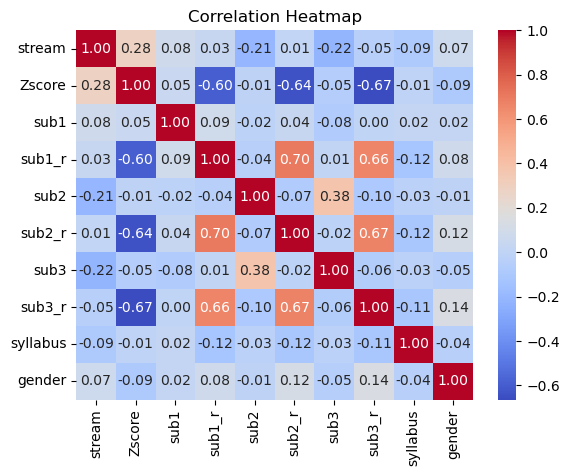

In [31]:
# Step 2: Exploratory Data Analysis (Optional but Recommended)
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
# Step 3: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:

# Step 4: Predictions and Evaluation
y_pred = model.predict(X_test)

In [34]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

0.15812437925304385
0.6064914926424201


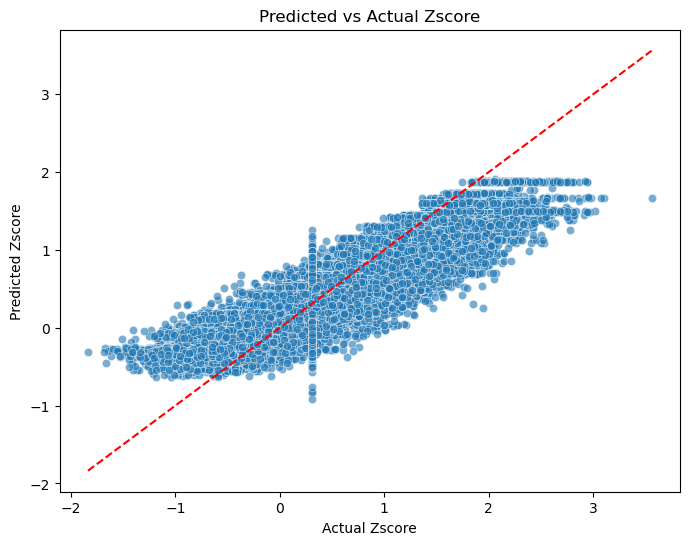

In [35]:
# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs Actual Zscore')
plt.xlabel('Actual Zscore')
plt.ylabel('Predicted Zscore')
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X_train_scaled = scaler.fit_transform(X_train) #ස්කේල්ඩ්
X_test_scaled = scaler.transform(X_test)

In [38]:
# Step 3: Model Training
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
# Step 4: Predictions and Evaluation
y_pred2 = model2.predict(X_test_scaled)

In [40]:
# Calculate metrics
mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)
print(mse2)
print(r22)

0.15812437925304387
0.60649149264242


In [41]:
6068556636717204

6068556636717204